# PREDICTING THE PERCENTAGE BASED ON NO OF HOURS OF STUDY

Here , We are going to predict the percentage of the student based on number of hours of study.

# Pre-processing steps of the data

In [70]:
#Importing libraries
import pandas as pd
import numpy as np

In [71]:
#Reading the data 
data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [72]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [73]:
#Shape of the data
data.shape

(25, 2)

In [74]:
#Checking the data in detail
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [75]:
#Checking the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualisation of the data 

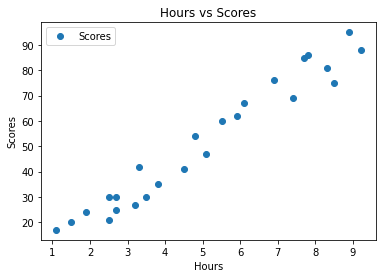

In [76]:
#Graph of hours vs scores
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
data.plot(x='Hours', y='Scores', style='o')    
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.title('Hours vs Scores')
plt.show()

BY LOOKING AT THE GRAPH WE CAN SAY THAT THERE IS A POSITIVE REALTION BETWEEN THEM.

# Train-Test split

In [77]:
#Split the data into train validation
from sklearn.model_selection import train_test_split 
x = data.iloc[:, :-1].values   # reshaped array
y = data.iloc[:, 1].values
x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2,random_state=0)

# Modeling

In [78]:
# Modeling by using linear regression
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(x_train,y_train)

y_predict_train_lrc = logistic.predict(x_train)
y_predict_val_lrc = logistic.predict(x_validation)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

print(classification_report(y_train,y_predict_train_lrc))
print(classification_report(y_validation,y_predict_val_lrc))

print("Train Accuracy is ",accuracy_score(y_train,y_predict_train_lrc ))
print("Validation Accuracy is ",accuracy_score(y_validation,y_predict_val_lrc))

              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          30       0.20      1.00      0.33         2
          35       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          60       1.00      1.00      1.00         1
          67       1.00      1.00      1.00         1
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          88       0.25    

D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediction

In [81]:
#Predicting the values 
y_pred = logistic.predict(x_validation)

In [82]:
y_pred

array([17, 30, 86, 30, 67], dtype=int64)

# Comparison actual vs predicted

In [83]:
#Comparing the values between the actual and predicted
df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17
1,27,30
2,69,86
3,30,30
4,62,67


# Prediction for 9.25 hrs

In [84]:
# Predicting if a student study for 9.25 hours how much will he/she score
hours = 9.25
print("No of Hours = ",hours)
print("Predicted Score = ",logistic.predict(np.array(hours).reshape(1,-1))[0])

No of Hours =  9.25
Predicted Score =  88


# Evaluation Metrics

In [85]:
#Evaluating the model using Mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_validation, y_pred)) 

Mean Absolute Error: 5.6
